In [1]:
from natsort import natsorted
from pathlib import Path
import sys, os
import mplhep as hep
import matplotlib.pyplot as plt

path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
print(path2add)

if (not (path2add in sys.path)) :
    sys.path.append(path2add)

from beamtest_analysis_helper import toSingleDataFrame_secondEventModel, DecodeBinary, plot_occupany_map, return_hist, plot_1d_TDC_histograms

/home/daq/ETROC2/ETROC-Analysis/TestBeam


In [2]:
# ### In case, you're using "nem" files (qinj)
# files = Path('/media/daq/X9/Run_nominal_alignment_12').glob('loop_*/*nem')
# print(files[0])
# print(files[-1])
# df = toSingleDataFrame_newEventModel(files=files)

# ### In case, you're converting from binary files
input_path = "/home/daq/ETROC2/ETROC-Data/CERN_May2025/Pre"
pattern = 'run_161/file*sem'
#pattern = 'physics_run_7/file*sem'
files = natsorted(list(Path(input_path).glob(pattern)))
print(files[0])
print(files[-1])

# To limit to the last N files:
#files = files[:-3]
df = toSingleDataFrame_secondEventModel(files=files)

filler_df = None
print(f'Nhits: {df.shape[0]}, Nevts: {df['evt'].nunique()}')

/home/daq/ETROC2/ETROC-Data/CERN_May2025/Pre/run_161/file_0.sem
/home/daq/ETROC2/ETROC-Data/CERN_May2025/Pre/run_161/file_16.sem
Nhits: 540072, Nevts: 45006


In [3]:
### In case, you're converting from binary files
input_path = "/home/daq/ETROC2/ETROC-Data/CERN_May2025/"
pattern = 'run_166/file*bin'
#pattern = 'physics_run_11/file*bin'

files = natsorted(list(Path(input_path).glob(pattern)))
print(files[0])
print(files[-1])

# First 3 files
#decode = DecodeBinary(firmware_key=0b0001, board_id=[0x17f0f, 0x17f0f, 0x17f0f, 0x17f0f], file_list=files[:3])
# Last 3 files
decode = DecodeBinary(firmware_key=0b0001, board_id=[0x17f0f, 0x17f0f, 0x17f0f, 0x17f0f], file_list=files[-3:])

df, _, _, filler_df = decode.decode_files() # hit dataframe, event dataframe, CRC dataframe, fillter dataframe

print(f'Nhits: {df.shape[0]}, Nevts: {df['evt'].nunique()}')

/home/daq/ETROC2/ETROC-Data/CERN_May2025/run_166/file_0.bin
/home/daq/ETROC2/ETROC-Data/CERN_May2025/run_166/file_0.bin
Warning! Found 40 bits word which is not matched with the pattern 0010111110010001001001110001000110001000
Nhits: 691035, Nevts: 165416


In [ ]:
chip_labels = [0, 1, 2, 3]
#chip_names = ["ET2p01_PT_NH18", "ET2p01_PT_NH17", "ET2p01_PT_NH15", "ET2p01_PT_NH11"] #First thermal cycle
chip_names = ["ET2p01_PT_NH18", "ET2p01_PT_NH17", "ET2p01_PT_NH15", "ET2p01_PT_NH14"]
offsets = [20, 20, 20, 20]
high_voltages = [230, 230, 230, 230]

chip_fignames = chip_names
chip_figtitles = [
    f"ET2.01 PacTech New HPK-18 HV{high_voltages[0]}V OS:{offsets[0]}",
    f"ET2.01 PacTech New HPK-17 HV{high_voltages[1]}V OS:{offsets[1]}",
    f"ET2.01 PacTech New HPK-15 HV{high_voltages[2]}V OS:{offsets[2]}",
    f"ET2.01 PacTech New HPK-14 HV{high_voltages[3]}V OS:{offsets[3]}",
    ]

colors = ['#1b9e77','#d95f02','#7570b3','#e7298a']

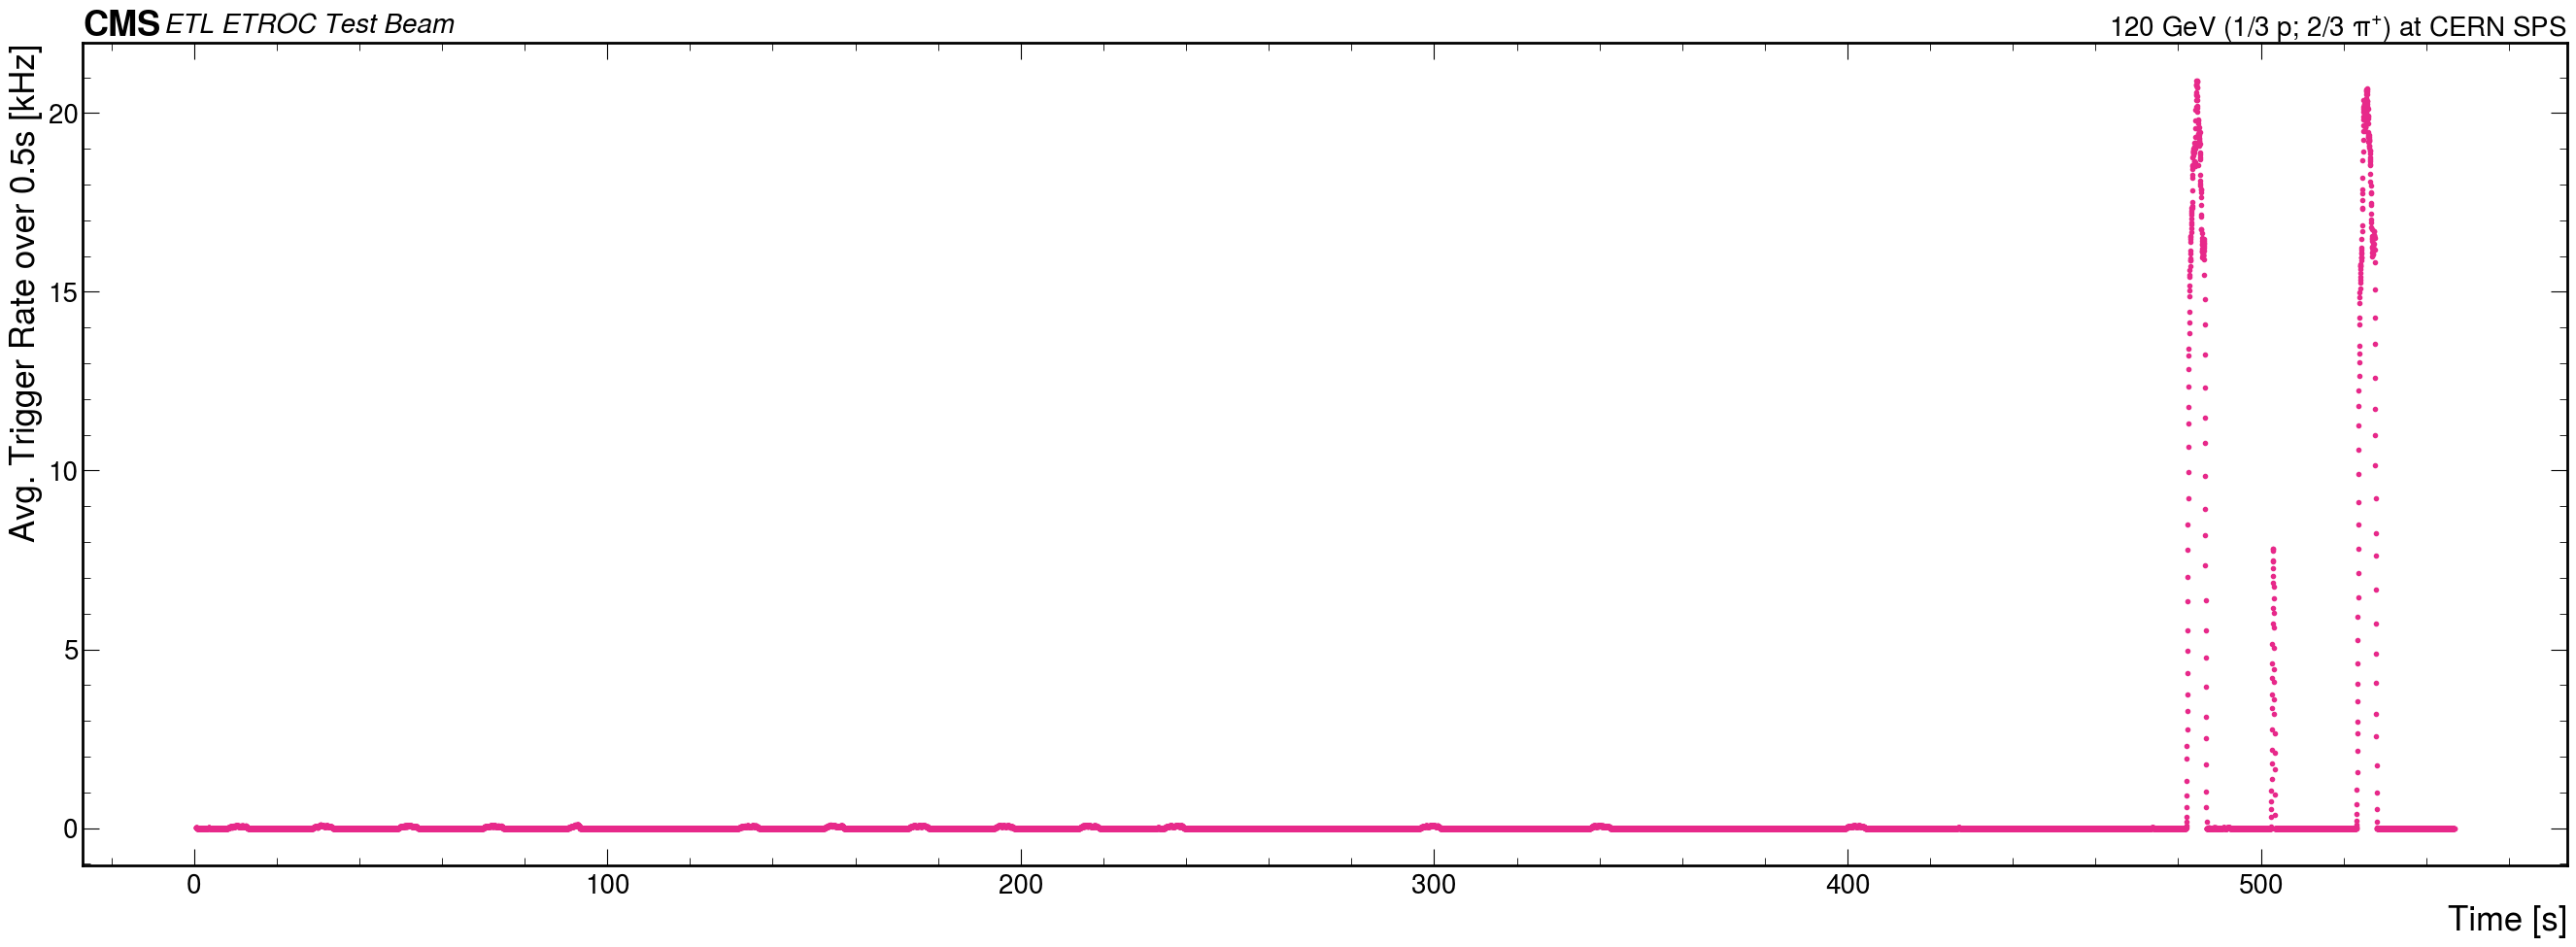

In [5]:
if filler_df is not None:
    df_40 = filler_df.loc[filler_df['type']==b'40']
    df_40.reset_index(inplace=True)
    avg_df4 = df_40['events'].rolling(window=20).sum().to_frame(name='avg').reset_index()

    fig, ax = plt.subplots(figsize=(33, 11))
    hep.cms.text(loc=0, ax=ax, text="ETL ETROC Test Beam", fontsize=20)
    ax.set_title(r'120 GeV (1/3 p; 2/3 $\pi^{+}$) at CERN SPS', loc='right', fontsize=20)

    ax.plot(avg_df4['index']*0.025, avg_df4['avg']*1e-3/(20.*0.025*1.024**2), '.', color=colors[3])#, label='Rolling Avg Size 20')

    ax.set_xlabel('Time [s]', fontsize=25)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_ylabel('Avg. Trigger Rate over 0.5s [kHz]', fontsize=25)
    #ax.set_ylim(-0.1, 6)
    #ax.set_xlim(100, 200)
    #ax.set_xlim(7500, 8000)
    # ax.set_xlim(18000, 18100)
    # ax.legend(fontsize=20)

    # fig.savefig('trigger_rate.png')

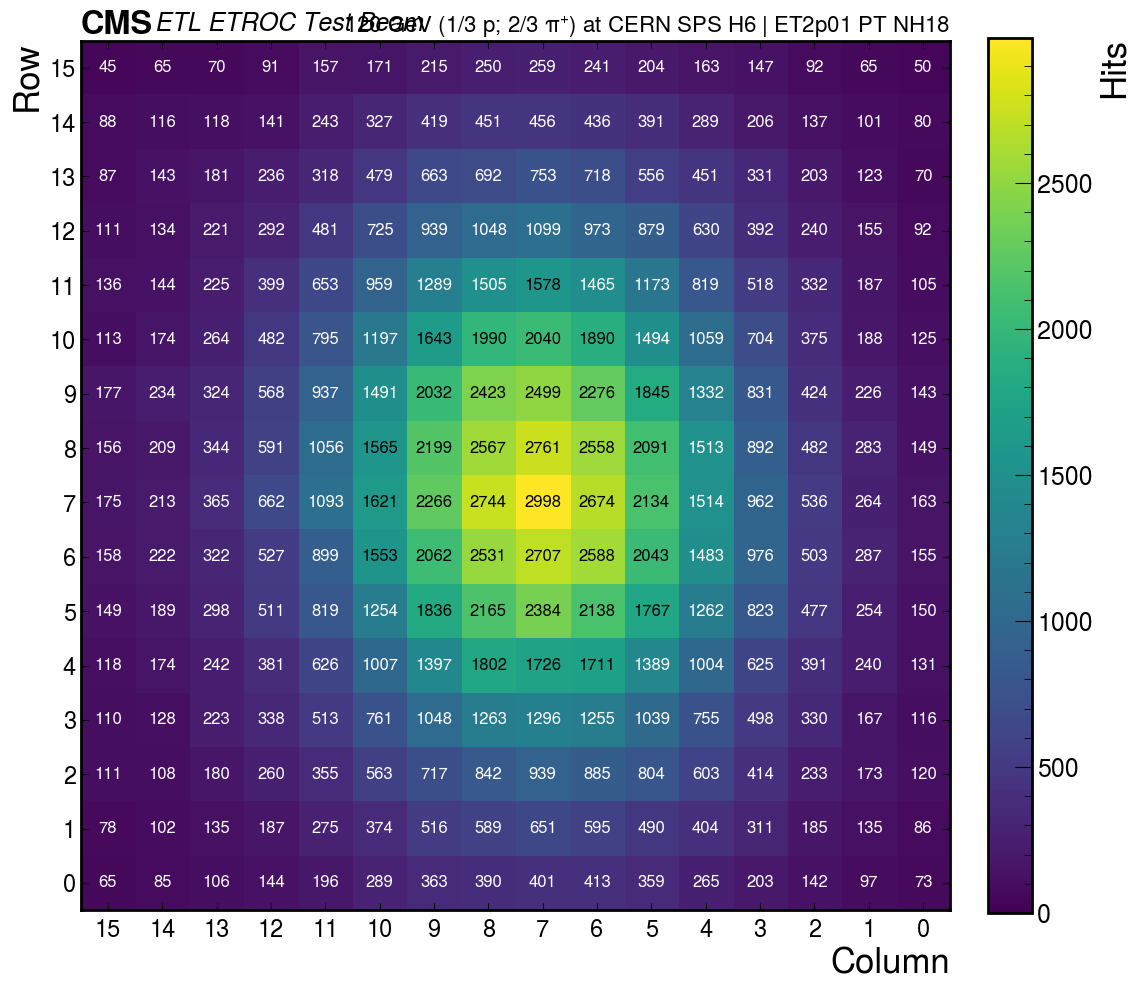

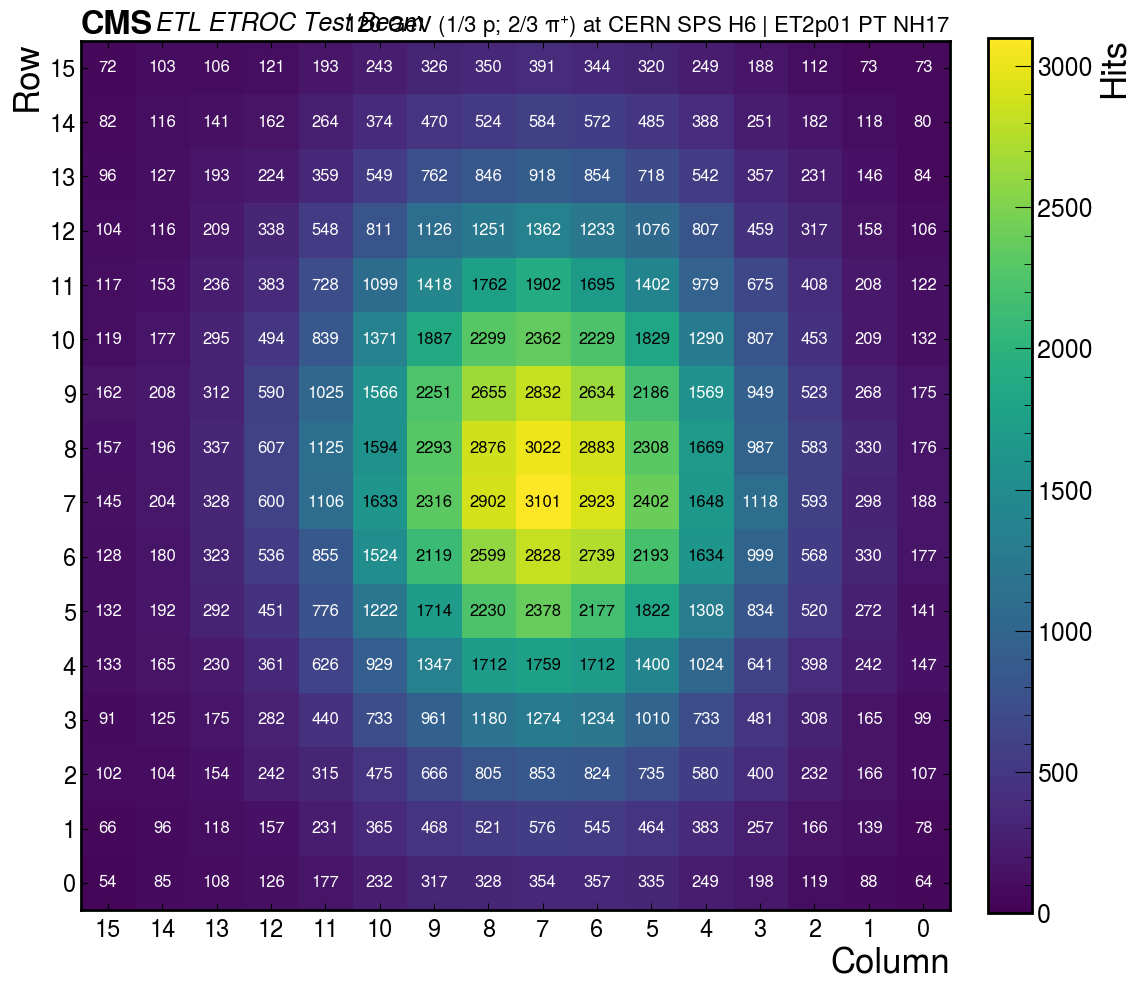

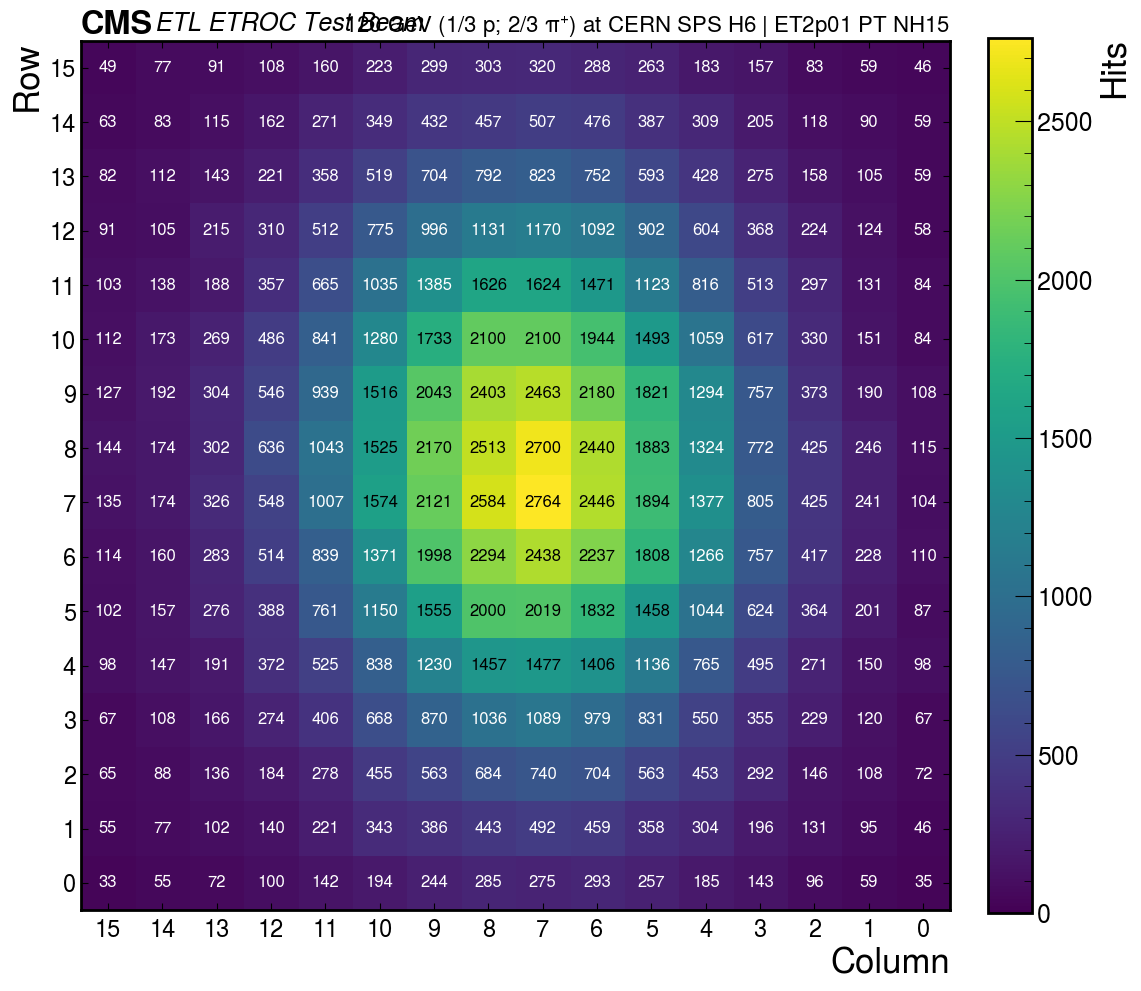

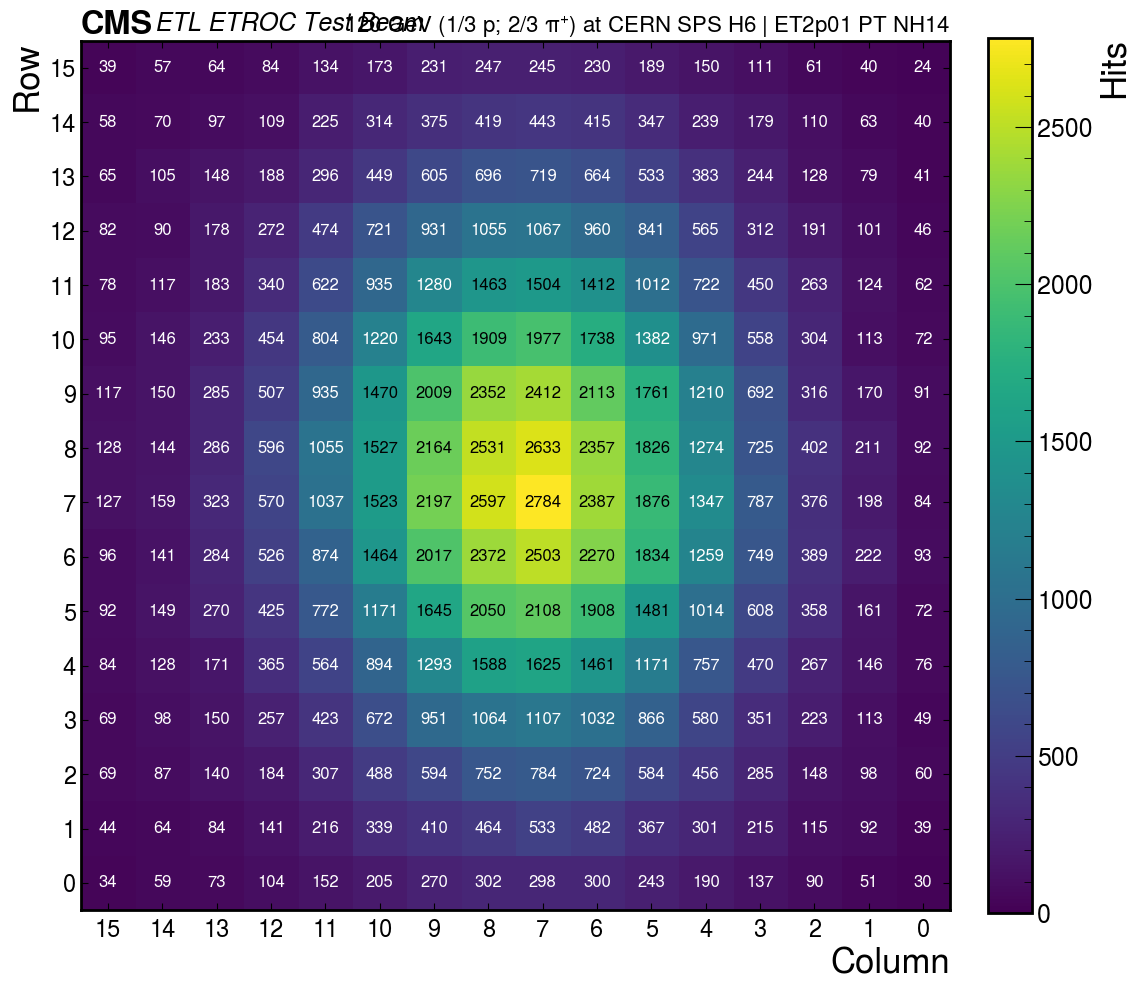

In [6]:
plot_occupany_map(df, board_ids=chip_labels, board_names=chip_names, tb_loc='cern')

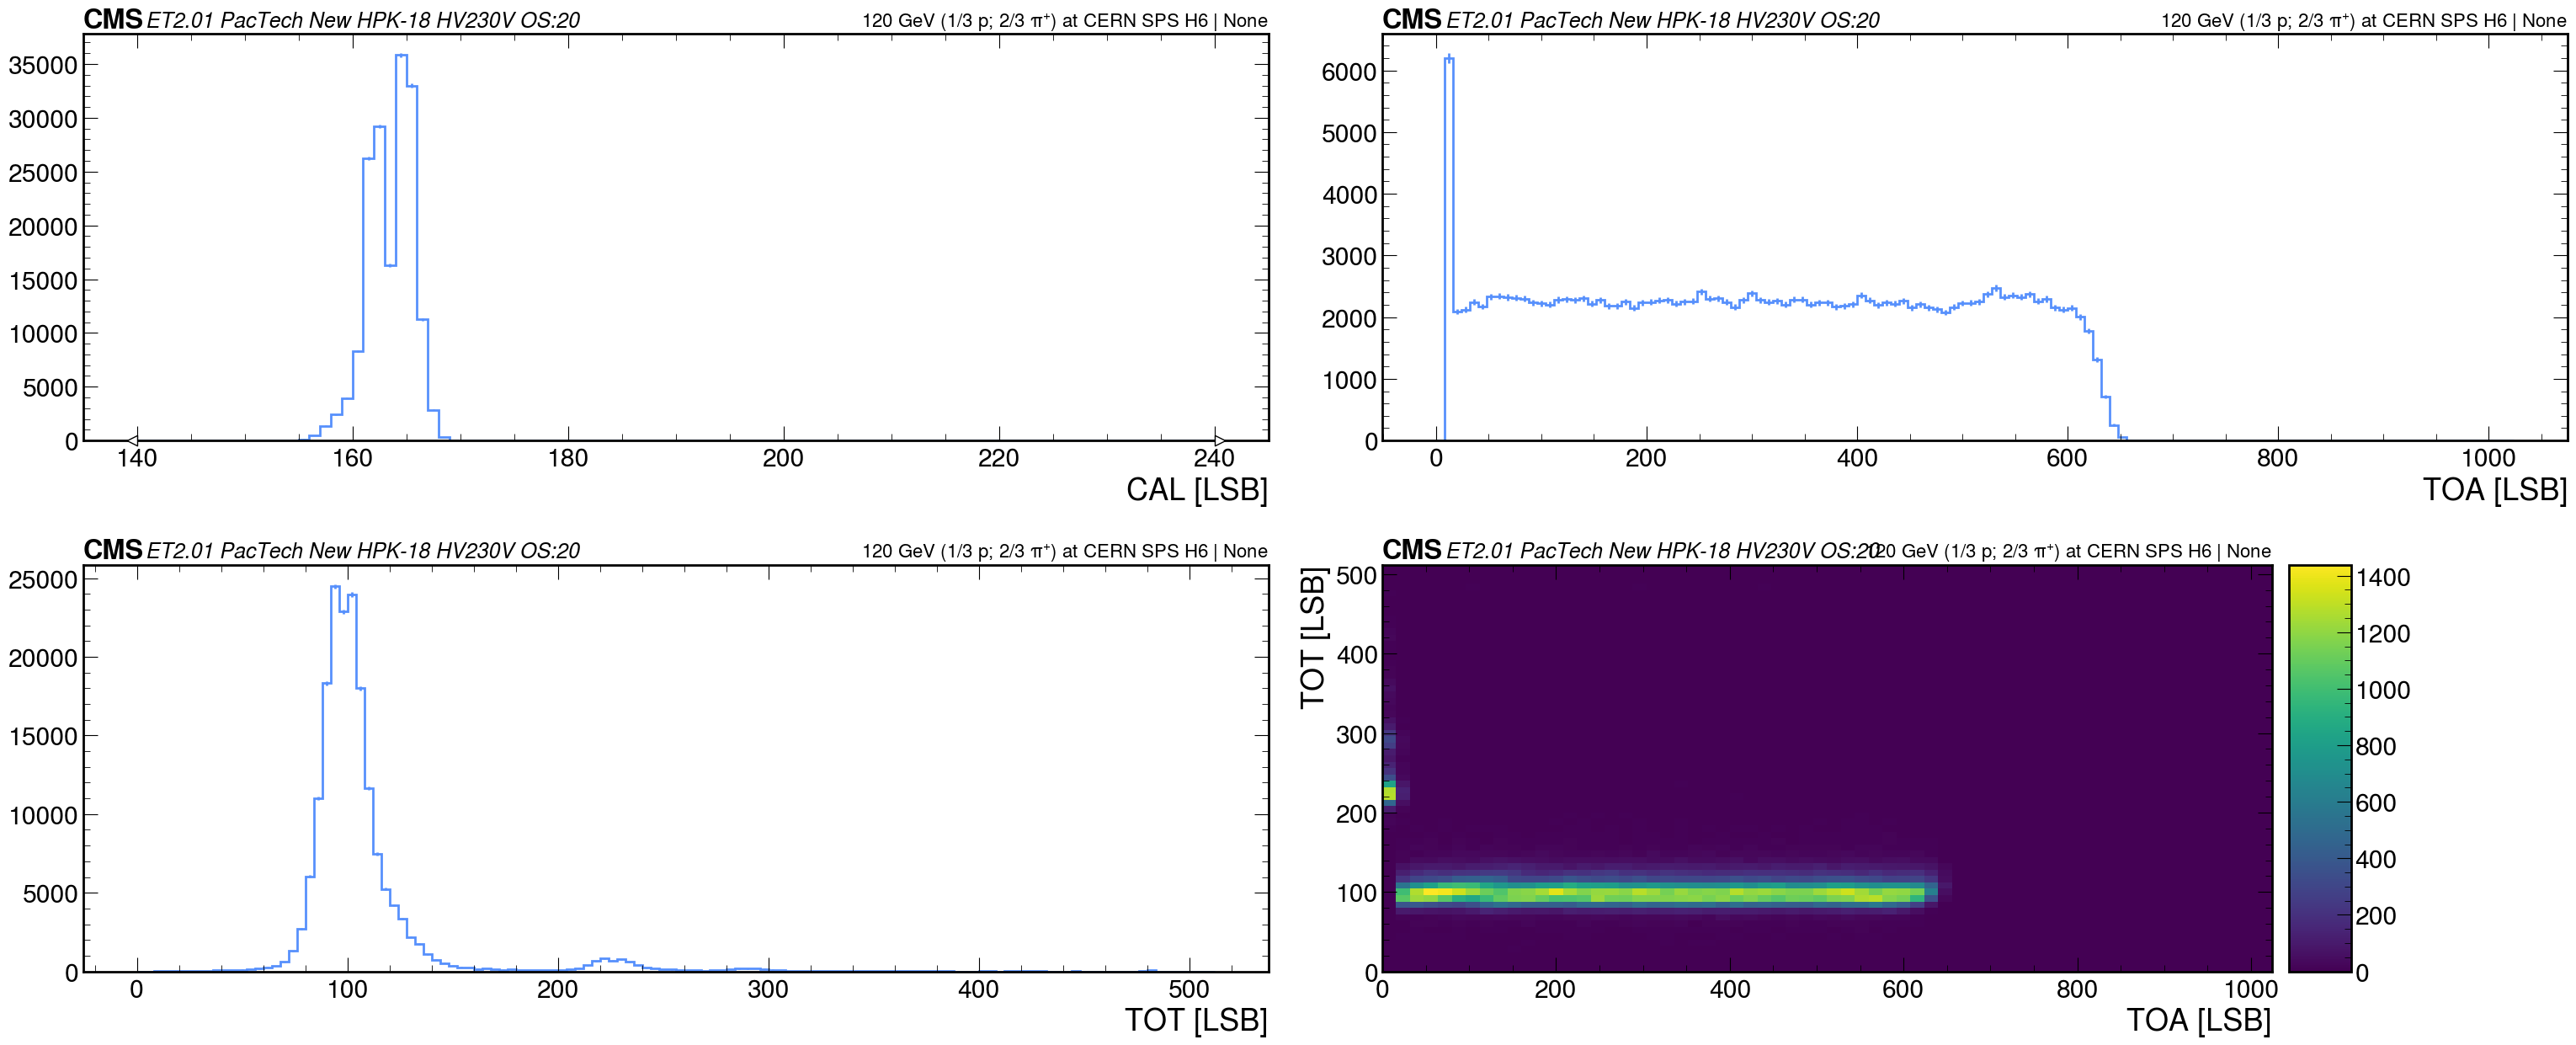

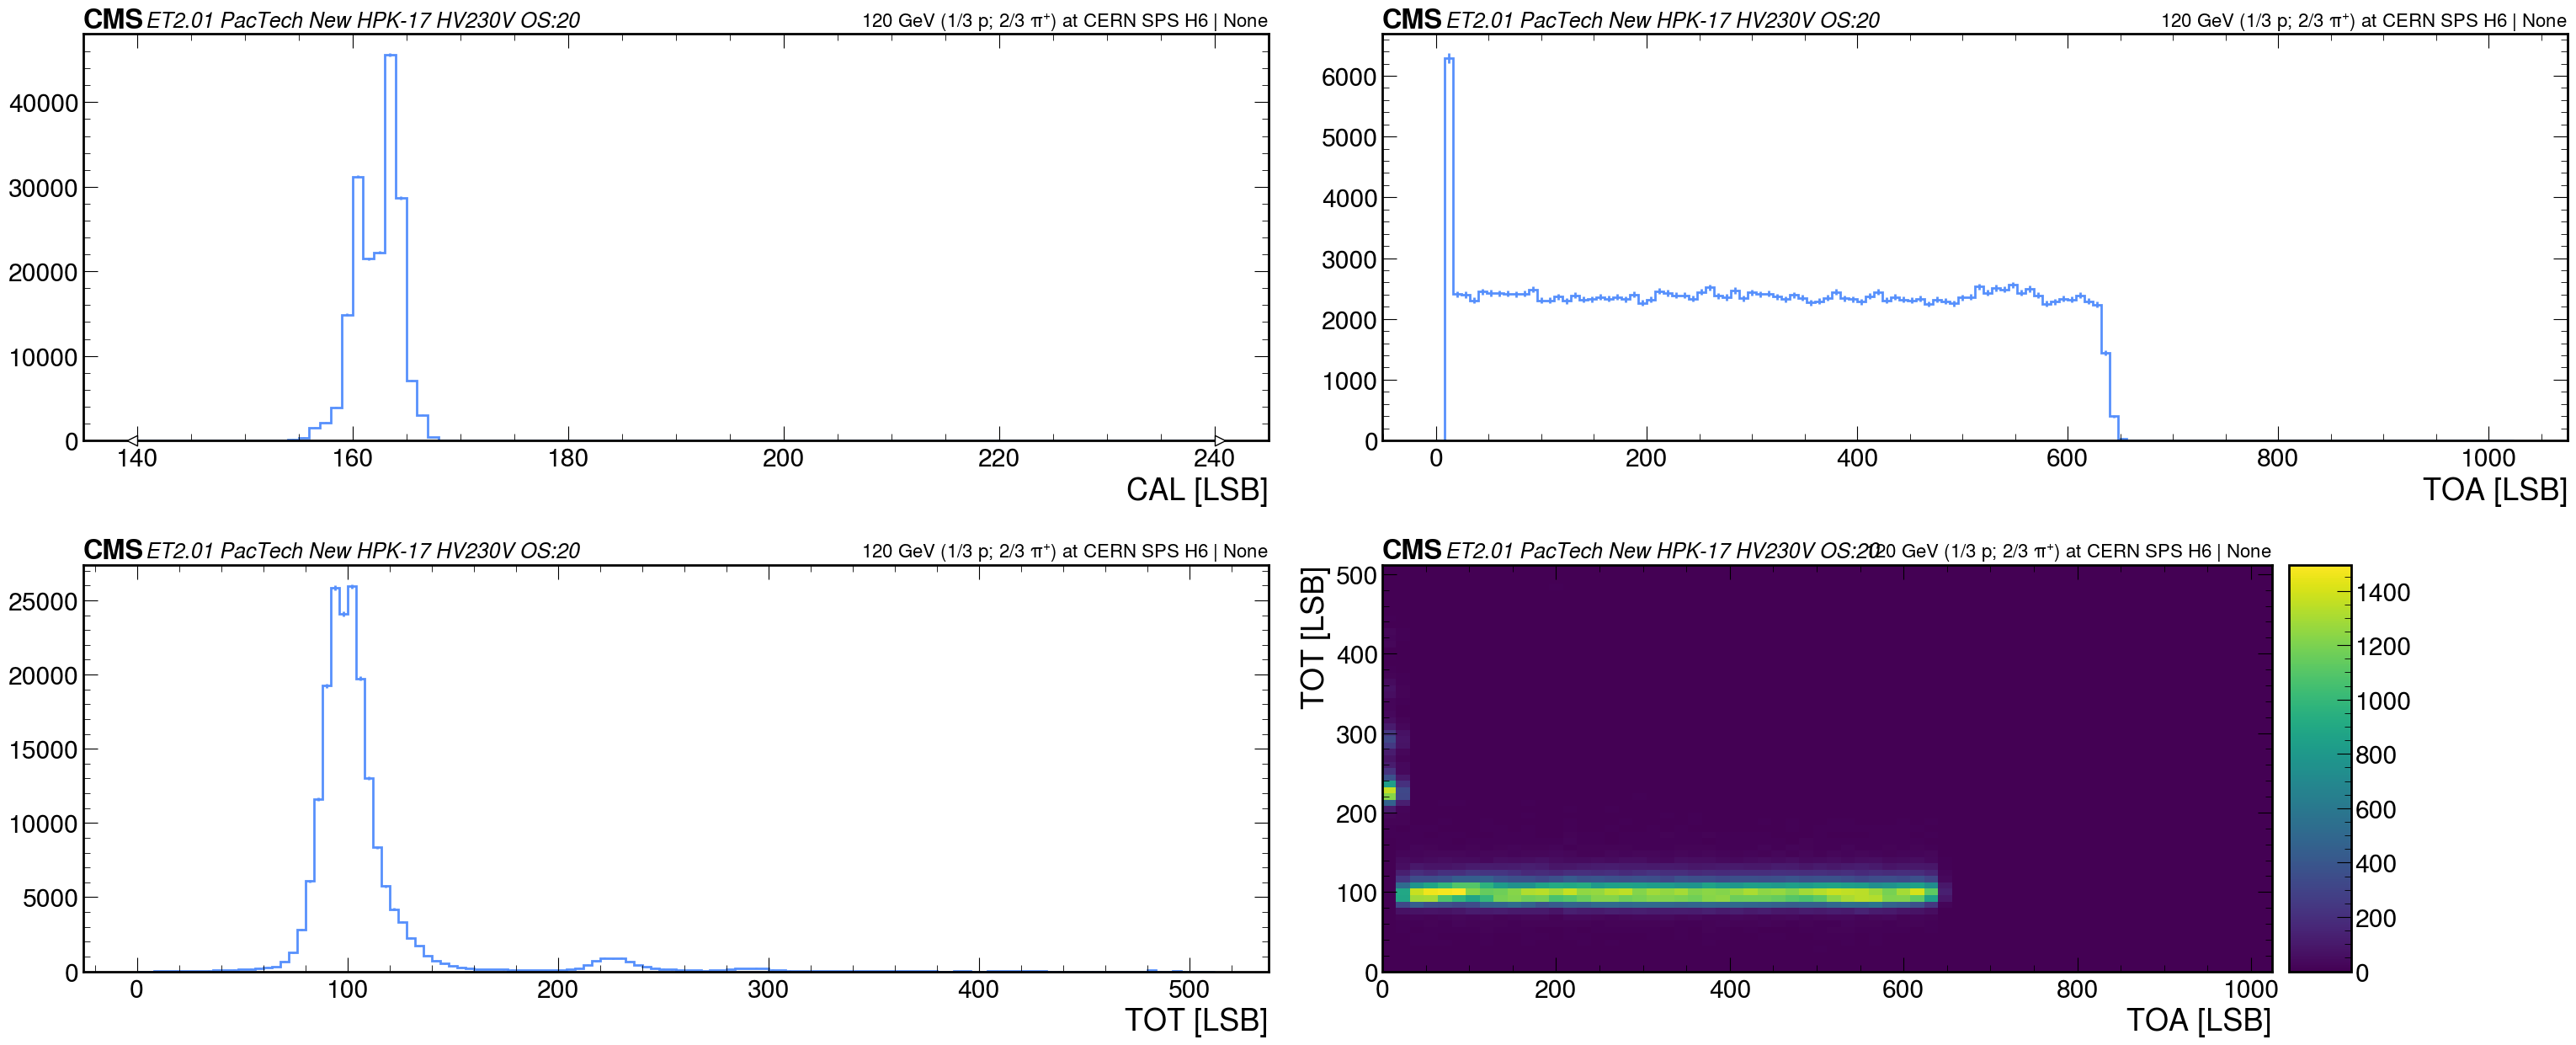

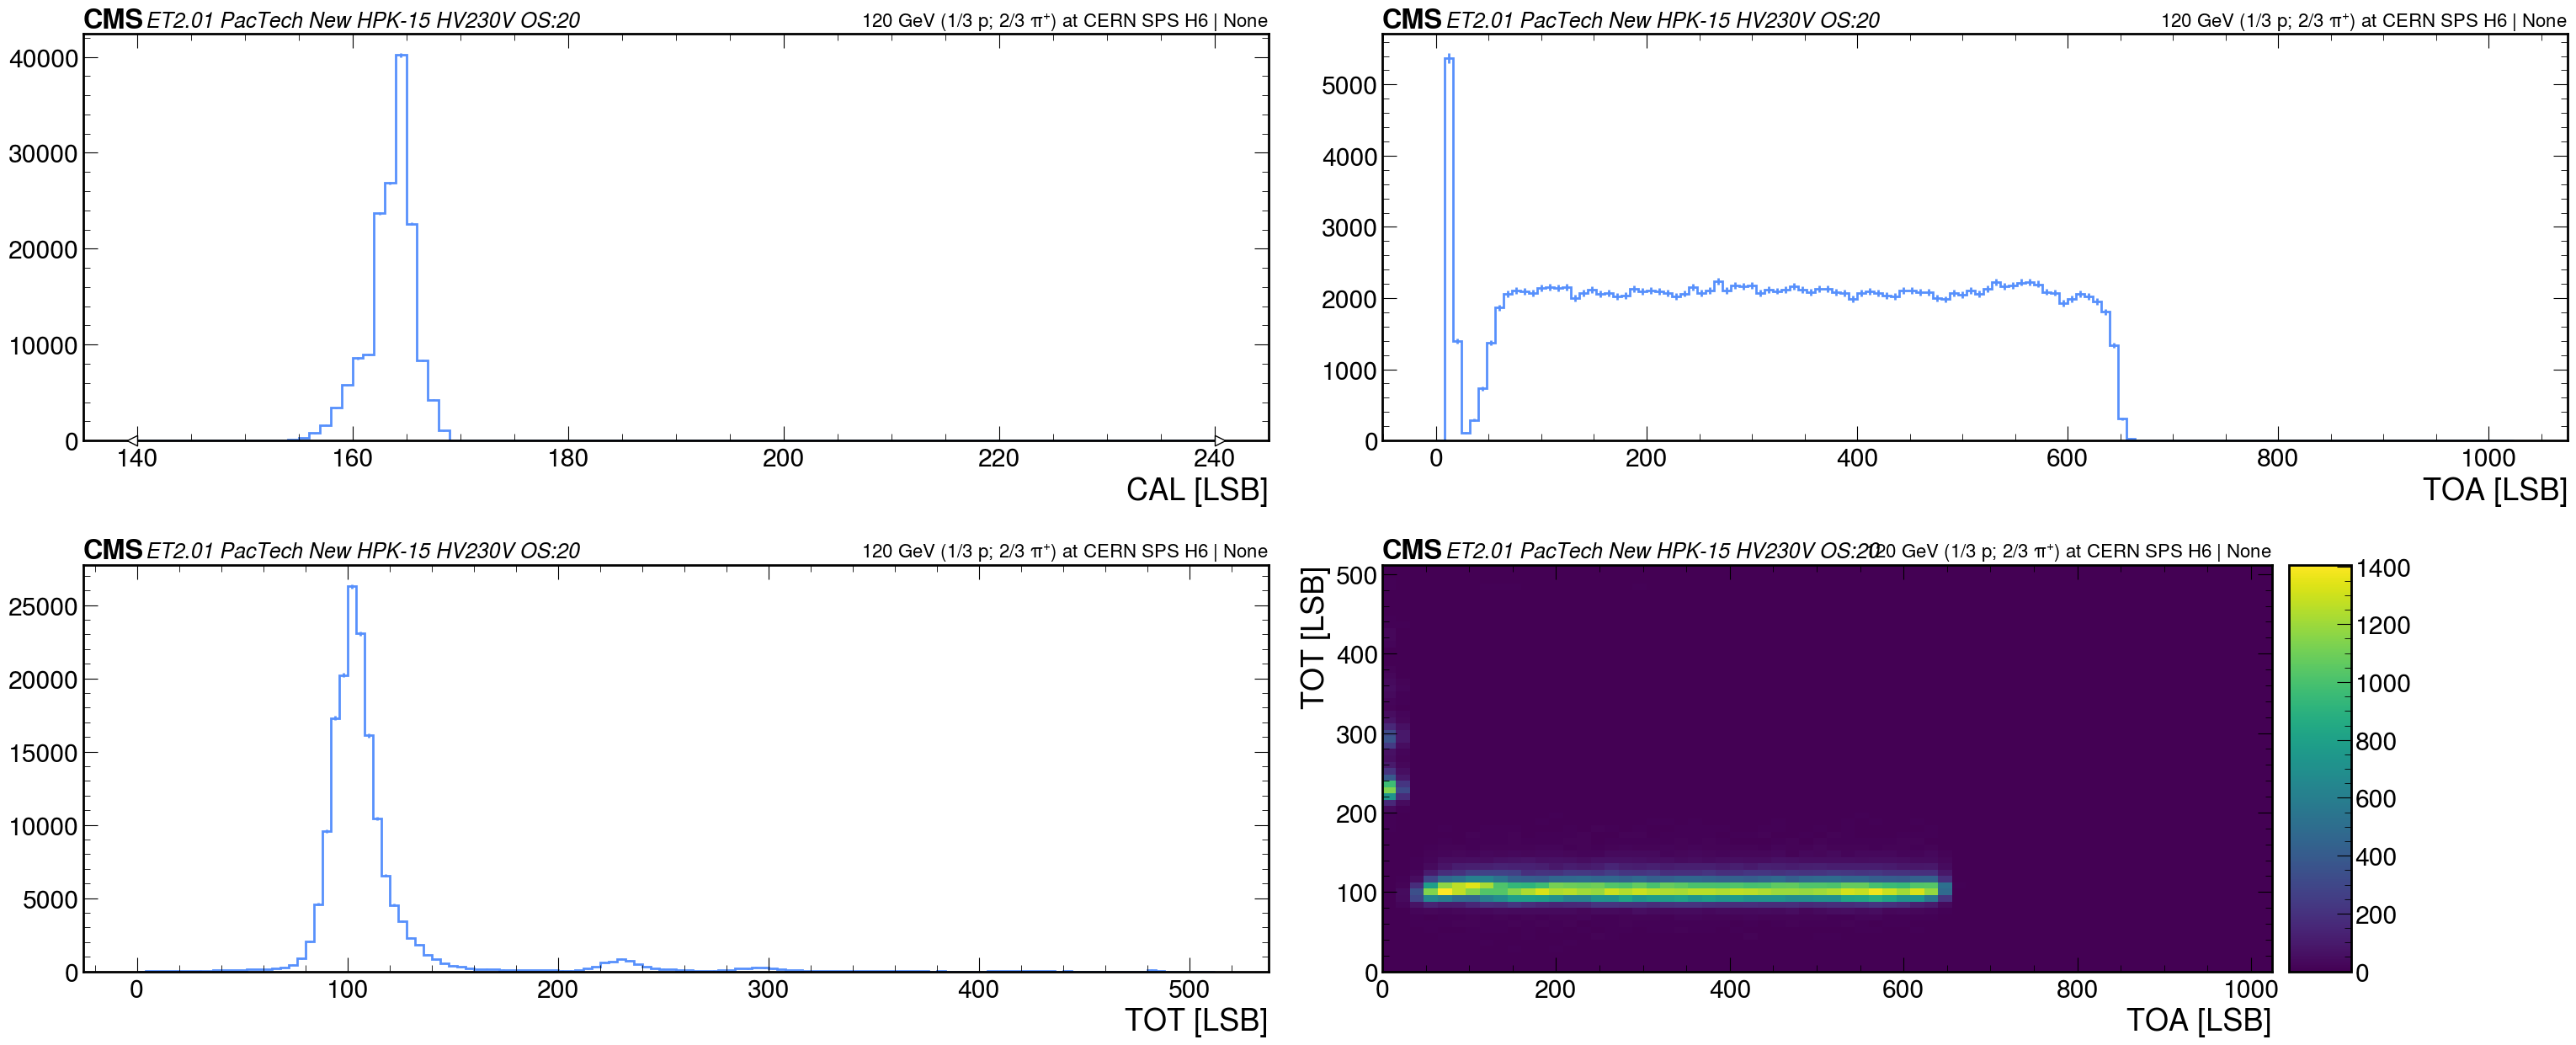

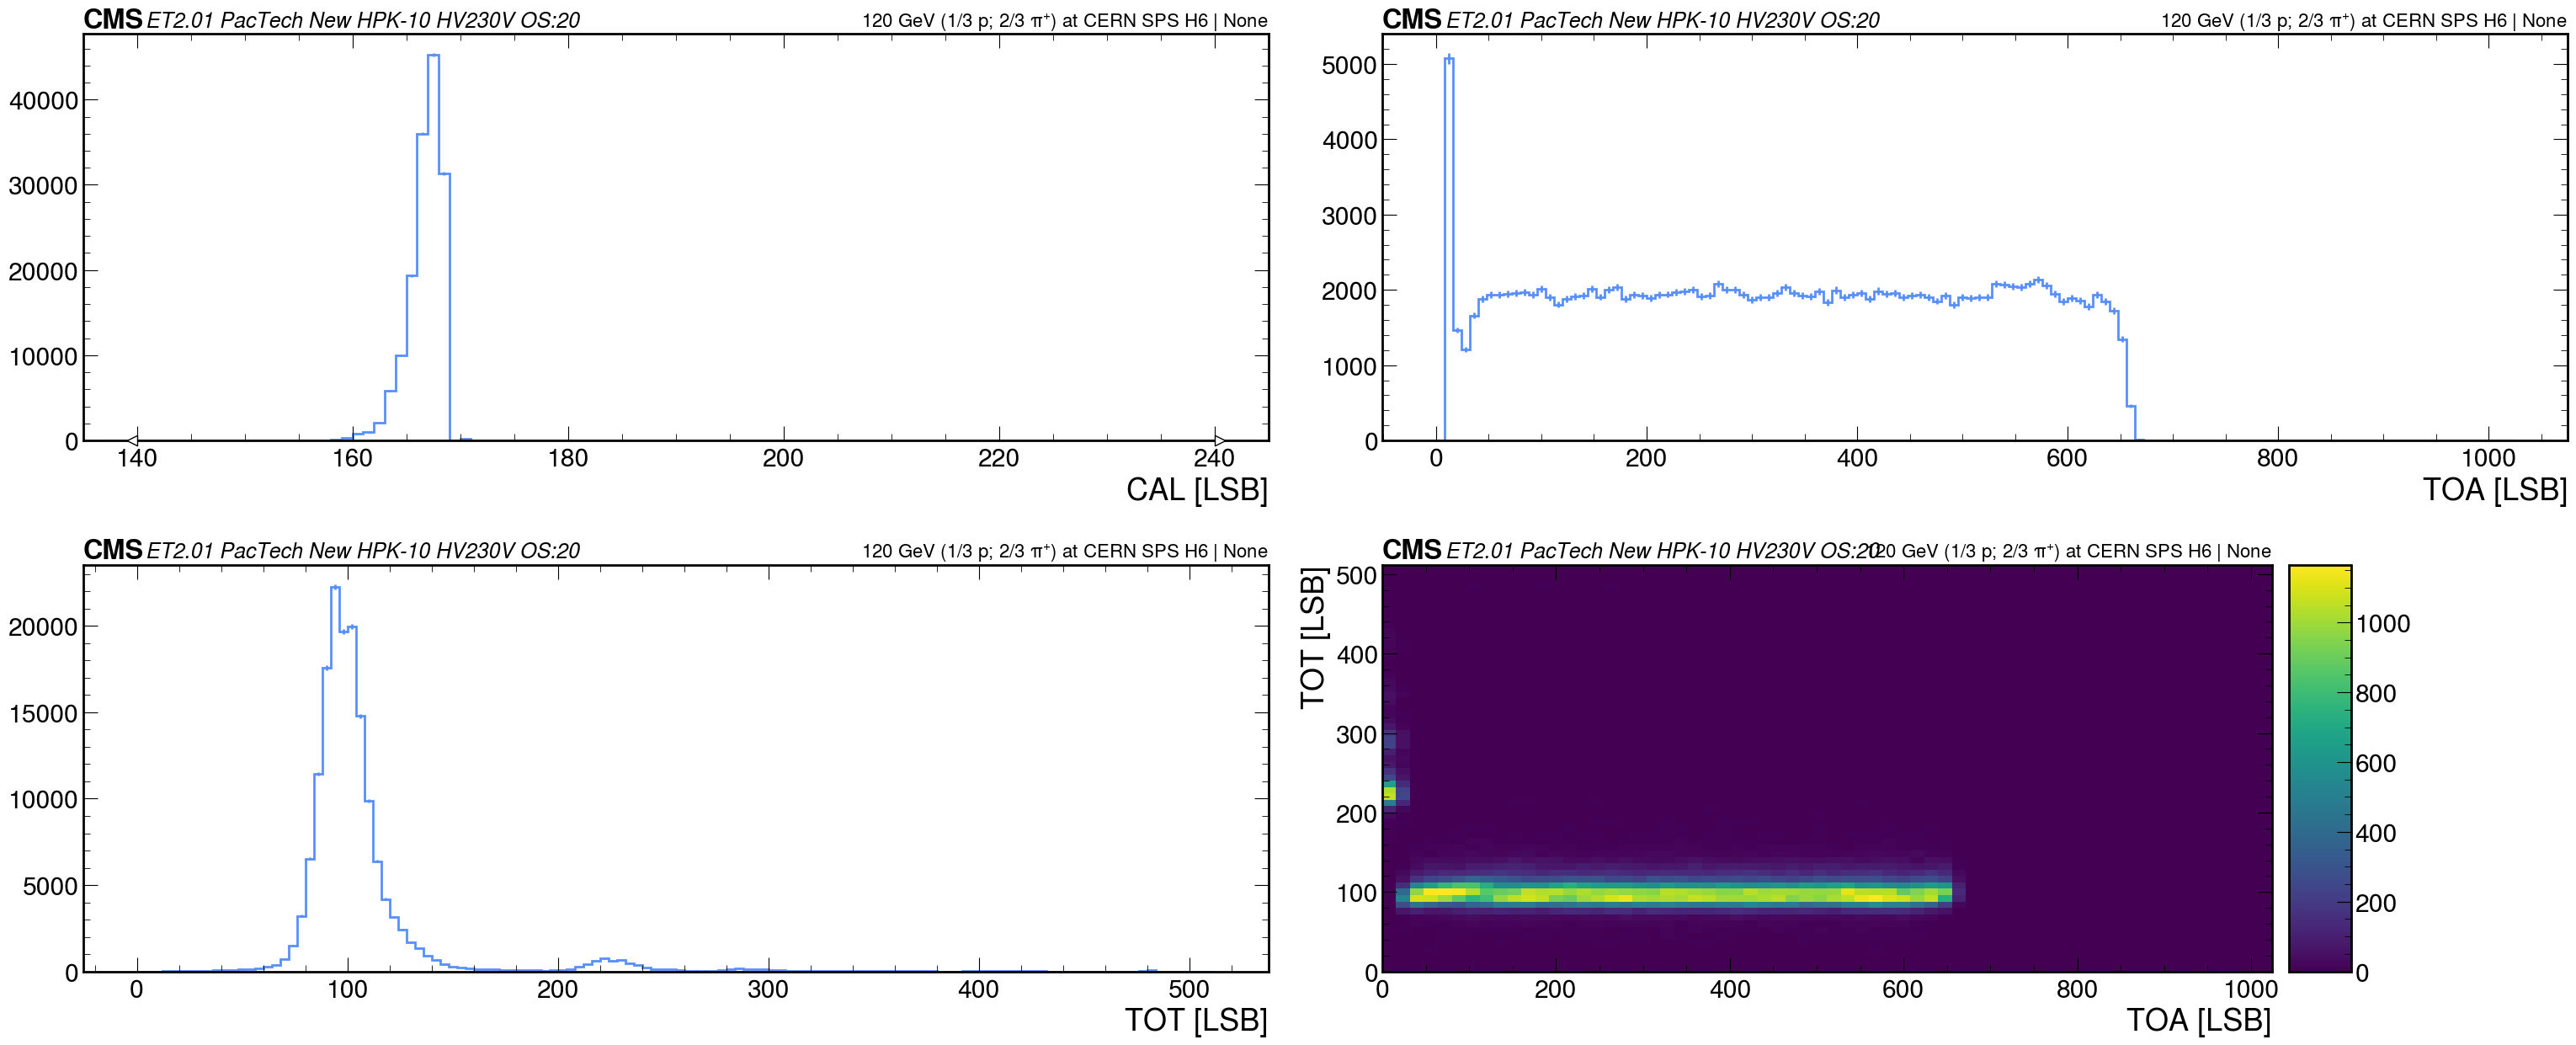

In [7]:
h_inclusive = return_hist(input_df=df, board_names=chip_names, board_ids=chip_labels, hist_bins=[100, 128, 128])
for iboard in chip_labels:
    plot_1d_TDC_histograms(h_inclusive, chip_names[iboard], 'cern', chip_figtitles[iboard], slide_friendly=True)
del h_inclusive